In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

# Dự đoán giá nhà với Multivariate Linear Regression

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

## 1. Load dữ liệu và kiểm tra

In [3]:
npzfile = np.load("data/boston_housing.npz")
#print(npzfile.files)
X = npzfile["x"]
Y = npzfile["y"]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


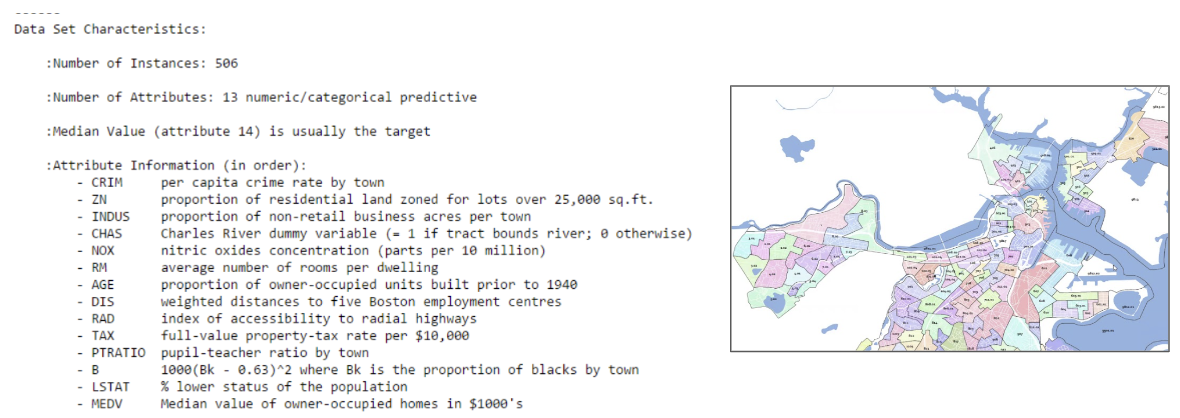

In [4]:
print(X[0])

[  0.006  18.      2.31    0.      0.538   6.575  65.2     4.09    1.
 296.     15.3   396.9     4.98 ]


In [5]:
print(Y[0])

24.0


In [6]:
print(np.min(Y), np.max(Y), np.mean(Y))

5.0 50.0 22.532806324110677


## 2. Chia dữ liệu ra thành 2 tập train và test

**(1) Tạo các indices ngẫu nhiên**

In [7]:
np.random.seed(3)
rand_indices = np.arange(Y.size)
np.random.shuffle(rand_indices)

print(rand_indices.size)
print(rand_indices)

506
[224 137 453 303 254  37 442 417  16 209 126 157 196 266 404 399 116 127
 134 201 503 161 287  73 439 325 112 310  14 230  27 291 479 102 124 376
 248 237 354 334 153 392 218 458 357 101 269 211 348 103 349 132 280 317
 358 367 166 139 194 130 164 485 179  57 432  87  40  51  80 278  43 240
 155 190 445 210  66 159 342 420  81 451 406  15 111 382 271 389  67 313
 361 500 328 225 175 475 204 434 294 306 463 332 454 471 281 477 107 214
 319 186 409 394 136 314  83 323 197 344  61 239 410 388 396  59 496 105
  10  55 457 338  56 364 441  88 270  24 114 425  31 343 144 177 251 340
 412 262 449 185 128 469 123 347 359 374  98 273 329 170 203 229 146 421
 355 301 286 244 243 455 108 272   3 180 189  82 478  53 260  84 436 493
 227 430 385  74 464 411 282 321  23 247 154 233 191 484  18 296  50  38
 193 288 188 491   5  75 142  47  46  70 502  79  30  11 356 489 452 298
 115  25 371 195 373  65 284  45 429 327 494 402 241 472 486 268  68  21
  77 304 448 236 416 505  58 125 228  42   4 12

**(2) Chia các indices ra làm 2 phần**

In [8]:
N_TRAIN = 400
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)

[104 312 437 498  91 182 315 459 172 232 473  36 156   2 242 308 289  48
 414 141 223 352 183 331 446 487 160 336 400 219  99 380 235 450 117 341
   1 113 462 174 253 444 501 184 165 372 274 192   0  54 375  28 206 383
 492  49 350  20 293 176 335 379  33 171   7 318 504 106 413  97 110 360
  69 346 435 129 316 447 258 322 150 474 337  26 398 423  93 428 148 480
 422 119 405 138 169 363 202 147 277 256 456 440 131 249 152 362]


**(3) Dựa vào 2 tập index để lấy ra 2 tập dữ liệu**

In [9]:
x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

(400, 13) (400,)


In [10]:
x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(106, 13) (106,)


## 3. Tạo mô hình Linear Regression
Sử dụng lớp `LinearRegression` của thư viện `sklearn`

### 3.1. Khởi tạo và huấn luyện (fit) mô hình

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Thực hiện huấn luyện mô hình với hàm fit(x,y)
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# Kiểm tra các hệ số của mô hình
print(model.coef_)
print(model.intercept_)

[ -0.062   0.044   0.037   2.609 -18.593   3.566   0.006  -1.6     0.323
  -0.014  -1.001   0.011  -0.593]
40.135900798429546


In [14]:
# Lấy ra các hệ số (a, b)
a = model.coef_
b = model.intercept_

### 3.2. Kiểm tra mô hình

**(1) Thử kiểm tra lại với một train-sample**

In [15]:
s = x_train[0]
y0_predict1 = np.sum(s*a) + b
y0_predict1

38.72927252397484

In [16]:
y_train[0]

44.8

**Dùng hàm predict của mô hình**

In [17]:
y0_predict2 = model.predict([s])
y0_predict2

array([38.729])

### 3.3. Đánh giá R2 - Q2

**(1) Thử đánh giá lại trên tập train**

In [18]:
r2 = model.score(x_train, y_train)
print(r2)

0.7452121887690026


**(2) Đánh giá trên tập test**

In [19]:
q2 = model.score(x_test, y_test)
print(q2)

0.6975631301834103


## 4. Sử dụng mô hình

In [20]:
# Dự đoán toàn bộ tập test
y_hat = model.predict(x_test)
print(y_hat.shape)

(106,)


In [21]:
# Tính lỗi residual
err = y_hat - y_test
print(np.mean(abs(err))/22.53)

0.14951928518975216


**Trực quan hóa các kết quả**

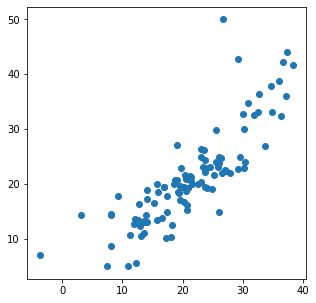

In [22]:
# Scatter plot
plt.figure(figsize=[5,5]) 
plt.scatter(y_hat, y_test)
plt.show()

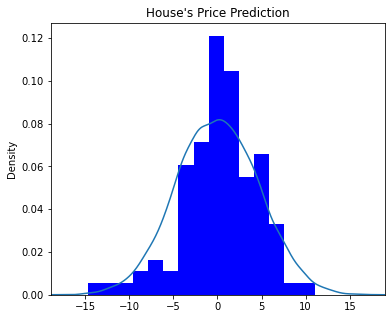

In [23]:
def plot_error(err, bins=10):
    mean, std = np.mean(err), np.std(err)
    
    plt.figure(figsize=[6,5])    
    plt.title("House's Price Prediction")
    plt.xlim([mean - 4*std,mean + 4*std]); #plt.ylim([0,60])
    plt.hist(err, density=True, bins=bins, color='b')
    
    #x = np.linspace(mean - 4*std, mean + 4*std,100)
    #plt.plot(x, stats.norm.pdf(x, mean, std))
    
    norm_dist = np.random.normal(mean, std, 10000)
    #plt.hist(norm_dist, color='g', alpha=0.4, density=True, bins=50)
    pd.Series(norm_dist).plot.kde()
    
    
    plt.show()
plot_error(err, bins=20)

**Cách tính R2 bằng hàm `r2_score` strong sklearn**

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.6975631301834103

**Khoảng tin cậy 95% của lỗi**

In [25]:
# CI 95%
np.percentile(err, [2.5, 97.5])

array([-10.945,   7.032])

==> Phát biểu: _"95% khả năng lỗi sẽ nằm trong khoảng từ -10.9 đến 7"_